In [2]:
import pandas as pd
import sqlite3

    connect to the database

In [3]:
con = sqlite3.connect('../data/checking-logs.sqlite')

    we analyze only the users and not the admins

    we create a new category for type of day (working/weekend)

In [4]:
query = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(query, con, parse_dates=['timestamp'])
commits['weekday'] = commits['timestamp'].dt.dayofweek
commits['day'] = commits.timestamp.dt.day
commits['hour'] = commits.timestamp.dt.hour
commits['type'] = commits['weekday'].apply(
    lambda x: 'working_day' if x < 5 else 'weekend')
commits = commits.drop(columns = ['weekday'])
commits

,uid,timestamp,day,hour,type
0,user_4,2020-04-17 05:19:02.744528,17,5,working_day
1,user_4,2020-04-17 05:22:35.249331,17,5,working_day
2,user_4,2020-04-17 05:22:45.549397,17,5,working_day
3,user_4,2020-04-17 05:34:14.691200,17,5,working_day
4,user_4,2020-04-17 05:34:24.422370,17,5,working_day
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,21,20,working_day
3203,user_1,2020-05-21 20:22:41.785725,21,20,working_day
3204,user_1,2020-05-21 20:22:41.877806,21,20,working_day
3205,user_1,2020-05-21 20:37:00.129678,21,20,working_day


    for each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue, 17-18: 6 commits, Wed, 17-18: 7 commits
    

In [5]:
commits_groupped = commits.groupby(['type', 'day', 'hour']).count()
commits_groupped = commits_groupped.groupby(
    ['type', 'hour']).mean()['uid'].astype('int').reset_index()
commits_groupped

,type,hour,uid
0,weekend,0,2
1,weekend,1,6
2,weekend,3,1
3,weekend,5,2
4,weekend,7,4
5,weekend,8,7
6,weekend,9,3
7,weekend,10,7
8,weekend,11,23
9,weekend,12,9


    we create a pivot table with data

In [6]:
pivot_table = pd.pivot(commits_groupped,
                       values='uid',
                       index='hour',
                       columns='type')
pivot_table

type,weekend,working_day
hour,,
0,2.0,3.0
1,6.0,NaN
3,1.0,2.0
5,2.0,7.0
6,NaN,1.0
7,4.0,5.0
8,7.0,3.0
9,3.0,6.0
10,7.0,13.0


    we draw a plot with average number of commits for both working days and weekend

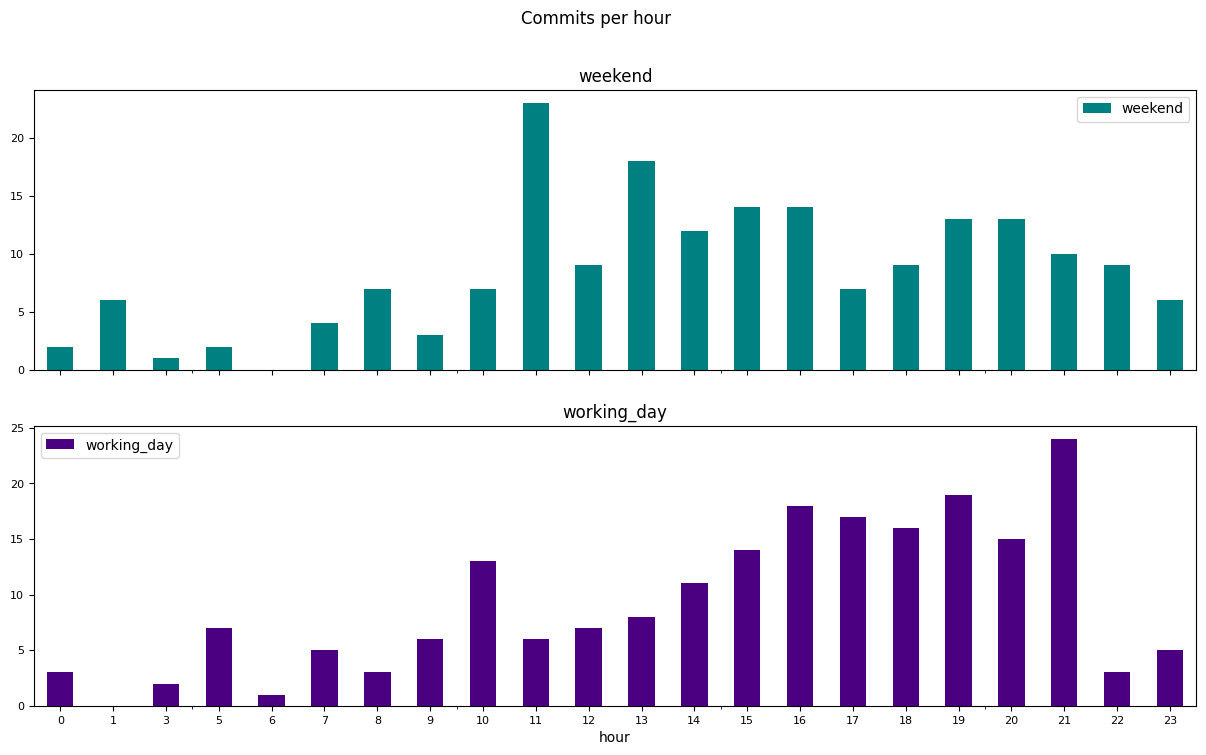

In [11]:
ax = pivot_table.plot(kind='bar',
                      figsize=(15, 8),
                      title='Commits per hour',
                      rot=0,
                      fontsize=8,
                      color=['teal', 'indigo'],
                      subplots=True)

    “Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend. 

In [8]:
pivot_table[pivot_table['working_day'] == pivot_table['working_day'].max()]

type,weekend,working_day
hour,,
21,10.0,24.0


In [9]:
pivot_table[pivot_table['weekend'] == pivot_table['weekend'].max()]

type,weekend,working_day
hour,,
11,23.0,6.0


there is a diff

In [10]:
con.close()